# Graf zbiorów bazowych dopuszczalnych i przejść pomiędzy nimi

Dla małych problemów możemy utworzyć pełen graf, którego wierzchołkami są dopuszcalne zbiory bazowe
  a skierowane krawędzie pokazują możliwe przejścia pomiędzy wierzchołkami.

## Utworzenie problemu liniowego do wizualizacji

### Losowy problem o zadanej wielkości

Parametry:

* random_seed - ziarno inicjalizujące generator liczb losowych (dla uzyskania powtarzalności)
* rows - liczba warunków w problemie (domyślnie 4)
* cols - liczba zmiennych w problemie (domyślnie 5)

In [6]:
# Problem o losowych współczynnikach
# Więcej o generowaniu losowych macierzy: https://doc.sagemath.org/html/en/reference/matrices/sage/matrix/special.html

def random_problem(random_seed = None, rows=4, cols=5):
    from sage.matrix.constructor import random_echelonizable_matrix
    matrix_space = sage.matrix.matrix_space.MatrixSpace(QQ, rows, cols)
    if random_seed is not None:
        set_random_seed(random_seed)
    A = random_echelonizable_matrix(matrix_space, rank=4, upper_bound=40)
    b = random_vector(QQ, 4)
    c = random_vector(QQ, 5)

    P = InteractiveLPProblemStandardForm(A, b, c)

    return P

P = random_problem(2)
show(P)

LP problem (use typeset mode to see details)

### Problem z wykładu

Pierwszy przykład analizowany na drugim wykładzie.

In [1]:
def small_problem():
    A = matrix(QQ, [[-1, 1], [1, 0], [0, 1]])
    b = vector(QQ, [1,3,2])
    c = vector(QQ, [1, 2])

    P = InteractiveLPProblemStandardForm(A, b, c)
    
    return P

## Generowanie wierzchołków grafu - zbiorów bazowych dopuszczalnych

In [3]:
from itertools import combinations

def basic_solutions(P: InteractiveLPProblemStandardForm):
    """Compute dictionary of basic feasible solutions of P indexed by basic sets, i.e.
       a mapping <basic set> -> <basic solution>."""
    
    A = P.A()
    n = A.ncols() # number of variables
    m = A.nrows() # number of constraints
    A = A.augment(identity_matrix(m))
    S = dict()
    
    b = P.b()
    for BasicSet in combinations(range(n + m), m):
        AB = A.matrix_from_columns(BasicSet)
        if AB.det() != 0:
            # We found a basic set
           
            x = AB.inverse() * b
            if min(x) >= 0:
                # We found a feasible basic solution
                
                S[BasicSet] = vector(QQ, [x[BasicSet.index(i)] if i in BasicSet else 0 for i in range(n+m)])
    return S

P = small_problem()
basic_solutions(P)

{(0, 1, 2): (3, 2, 2, 0, 0),
 (0, 1, 3): (1, 2, 0, 2, 0),
 (0, 2, 4): (3, 0, 4, 0, 2),
 (1, 3, 4): (0, 1, 0, 3, 1),
 (2, 3, 4): (0, 0, 1, 3, 2)}

## Generowanie krawędzi grafu - sąsiednich zbiorów bazowych

In [10]:
def solution_graph(P: InteractiveLPProblemStandardForm):
    r"""Create a graph (V, E) where
    
    V = set of basic feasible sets of P (vertices of the solution graph),
    E = pairs (B1, B2) of basic feasible sets of P such that #(B1 \ B2) = 1 and #(B2 \ B1) = 1.
    
    The edges are oriented in the direction of the gradient of the objective function.
    """
    
    c = vector(QQ, P.c().list() + ([0] * P.A().nrows()))
    
    S = basic_solutions(P)
    V = set(S)
    E = list()
    for B1 in V:
        for B2 in V:
            S1 = set(B1)
            S2 = set(B2)
            if len(S1.difference(S2)) == 1 and len(S2.difference(S1)) == 1:
                if c * S[B1] <= c * S[B2]:
                    E.append((B1, B2, c * S[B2] - c * S[B1]))
   
    g = DiGraph(E)
    return g

## Przykłady grafów

LP problem (use typeset mode to see details)

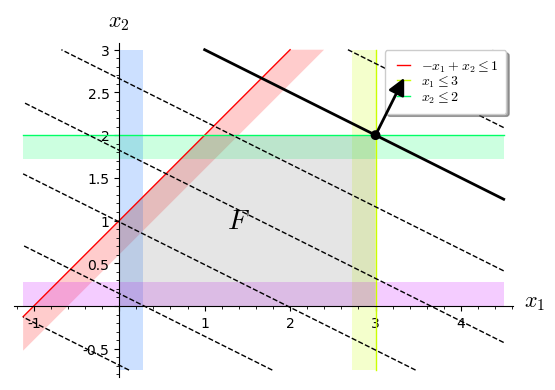

{(0, 1, 2): (3, 2, 2, 0, 0),
 (0, 1, 3): (1, 2, 0, 2, 0),
 (0, 2, 4): (3, 0, 4, 0, 2),
 (1, 3, 4): (0, 1, 0, 3, 1),
 (2, 3, 4): (0, 0, 1, 3, 2)}

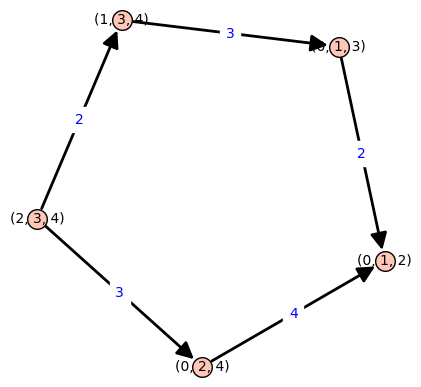

In [39]:
P = small_problem()
pretty_print(P)
show(P.plot())
pretty_print(basic_solutions(P))
show(solution_graph(P).plot(edge_labels=True))

LP problem (use typeset mode to see details)

{(0, 2, 5, 7): (9, 0, 9, 0, 0, 24, 0, 125/2, 0),
 (2, 3, 5, 8): (0, 0, 58, 107/2, 0, 751, 0, 0, 785/2),
 (2, 5, 7, 8): (0, 0, 9/2, 0, 0, 111/2, 0, 107/2, 18)}

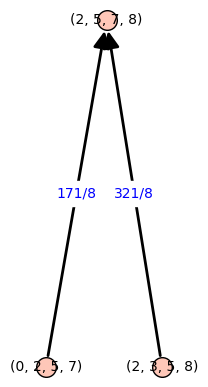

In [52]:
P = random_problem(7)
pretty_print(P)
print('\n\n')
pretty_print(basic_solutions(P))
show(solution_graph(P).plot(edge_labels=True, layout='acyclic'))

LP problem (use typeset mode to see details)

{(0, 2, 6, 8): (3/2, 0, 1/2, 0, 0, 0, 7/6, 0, 11/2),
 (0, 3, 6, 8): (1, 0, 0, 1/7, 0, 0, 23/21, 0, 36/7),
 (2, 4, 6, 8): (0, 0, 1/2, 0, 1/2, 0, 2/3, 0, 4),
 (2, 5, 6, 8): (0, 0, 1/2, 0, 0, 3/2, 7/6, 0, 7),
 (3, 4, 6, 8): (0, 0, 0, 1/7, 1/3, 0, 16/21, 0, 29/7),
 (3, 5, 6, 8): (0, 0, 0, 1/7, 0, 1, 23/21, 0, 43/7)}

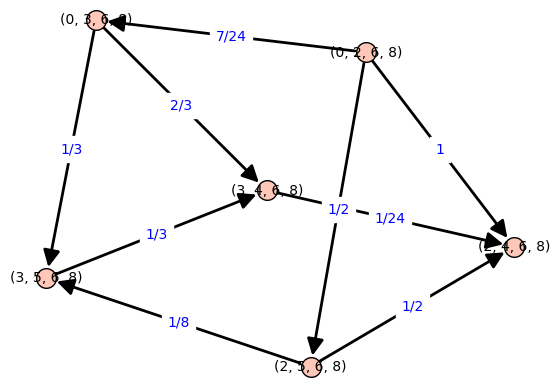

In [46]:
P = random_problem(11)
pretty_print(P)
print('\n\n')
pretty_print(basic_solutions(P))
show(solution_graph(P).plot(edge_labels=True))

LP problem (use typeset mode to see details)

{(0, 1, 2, 5): (37/22, 11/3, 1, 0, 0, 211/110, 0, 0, 0),
 (0, 1, 2, 8): (18/5, 11/3, 1, 0, 0, 0, 0, 0, 633/110),
 (0, 2, 3, 5): (2239/396, 0, 23/12, 11/12, 0, 3193/1980, 0, 0, 0),
 (0, 2, 3, 8): (109/15, 0, 23/12, 11/12, 0, 0, 0, 0, 3193/660),
 (0, 2, 5, 6): (233/858, 0, 2/13, 0, 0, 3389/4290, 11/39, 0, 0),
 (0, 2, 5, 7): (61/396, 0, 1/12, 0, 0, 689/990, 0, 11/12, 0),
 (0, 2, 6, 8): (69/65, 0, 2/13, 0, 0, 0, 11/39, 0, 3389/1430),
 (0, 2, 7, 8): (17/20, 0, 1/12, 0, 0, 0, 0, 11/12, 689/330),
 (0, 4, 6, 8): (16/85, 0, 0, 0, 1/17, 0, 16/51, 0, 3941/1870),
 (0, 4, 7, 8): (64/165, 0, 0, 0, 1/33, 0, 0, 32/33, 213/110),
 (1, 2, 4, 5): (0, 10075/2112, 593/704, 0, 111/704, 3561/1760, 0, 0, 0),
 (1, 2, 4, 8): (0, 464/75, 16/25, 0, 9/25, 0, 0, 0, 3561/550),
 (1, 4, 6, 8): (0, 32/105, 0, 0, 3/35, 0, 32/105, 0, 1747/770),
 (1, 4, 7, 8): (0, 64/105, 0, 0, 3/35, 0, 0, 32/35, 1747/770),
 (2, 3, 4, 5): (0, 0, 8039/2442, 10075/2442, 2239/1221, 10778/6105, 0, 0, 0),
 (2, 3, 4, 8): (0, 0, 56/15, 232/45, 109/45, 0, 0, 0, 5389/990),
 (2, 4, 5, 6): (0, 0, 577/5731, 0, 233/11462, 43541/57310, 10075/34386, 0, 0),
 (2, 4, 5, 7): (0, 0, 17/326, 0, 61/5379, 36419/53790, 0, 10075/10758, 0),
 (3, 4, 6, 8): (0, 0, 0, 32/705, 13/141, 0, 224/705, 0, 32273/15510),
 (3, 4, 7, 8): (0, 0, 0, 64/675, 67/675, 0, 0, 224/225, 27859/14850),
 (4, 5, 6, 8): (0, 0, 0, 0, 1/17, 16/85, 16/51, 0, 577/374),
 (4, 5, 7, 8): (0, 0, 0, 0, 1/33, 64/165, 0, 32/33, 17/22)}

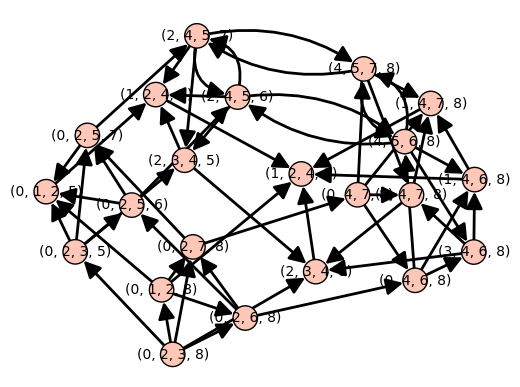

In [62]:
P = random_problem(3)
pretty_print(P)
print('\n\n')
pretty_print(basic_solutions(P))
show(solution_graph(P).plot(edge_labels=False))

In [66]:
# Czy pomiędzy zbiorami bazowymi (2,4,5,6) i (4,5,6,8) jest cykl? (nie - dlaczego?)

show(P.dictionary('x3', 'x5', 'x6', 'x7'))
show(P.dictionary('x5', 'x6', 'x7', 'x9'))

LP problem dictionary (use typeset mode to see details)

LP problem dictionary (use typeset mode to see details)

LP problem (use typeset mode to see details)

{(0, 1, 5, 7): (0, 0, 0, 0, 0, 1/2, 0, 4, 0),
 (0, 1, 7, 8): (3, 1/2, 0, 0, 0, 0, 0, 4, 7/2),
 (0, 2, 3, 7): (3/2, 0, 4/3, 5/6, 0, 0, 0, 8/3, 0),
 (0, 2, 5, 7): (0, 0, 0, 0, 0, 1/2, 0, 4, 0),
 (0, 2, 7, 8): (4, 0, 1/2, 0, 0, 0, 0, 7/2, 5/2),
 (0, 3, 4, 7): (17/6, 0, 0, 5/6, 4/3, 0, 0, 8/3, 0),
 (0, 3, 5, 7): (0, 0, 0, 0, 0, 1/2, 0, 4, 0),
 (0, 4, 5, 7): (0, 0, 0, 0, 0, 1/2, 0, 4, 0),
 (0, 4, 7, 8): (9/2, 0, 0, 0, 1/2, 0, 0, 7/2, 5/2),
 (0, 5, 6, 7): (0, 0, 0, 0, 0, 1/2, 0, 4, 0),
 (0, 5, 7, 8): (0, 0, 0, 0, 0, 1/2, 0, 4, 0),
 (1, 2, 3, 7): (0, 3/8, 29/24, 13/12, 0, 0, 0, 67/24, 0),
 (1, 2, 5, 7): (0, 0, 0, 0, 0, 1/2, 0, 4, 0),
 (1, 3, 4, 7): (0, 17/26, 0, 33/26, 29/26, 0, 0, 75/26, 0),
 (1, 3, 5, 7): (0, 0, 0, 0, 0, 1/2, 0, 4, 0),
 (1, 3, 7, 8): (0, 11/10, 0, 3/5, 0, 0, 0, 4, 29/10),
 (1, 4, 5, 7): (0, 0, 0, 0, 0, 1/2, 0, 4, 0),
 (1, 5, 6, 7): (0, 0, 0, 0, 0, 1/2, 0, 4, 0),
 (1, 5, 7, 8): (0, 0, 0, 0, 0, 1/2, 0, 4, 0),
 (2, 3, 5, 7): (0, 0, 0, 0, 0, 1/2, 0, 4, 0),
 (2, 3, 6, 7): (0, 0, 7/3, 11/6, 0, 0, 3/2, 37/6, 0),
 (2, 4, 5, 7): (0, 0, 0, 0, 0, 1/2, 0, 4, 0),
 (2, 5, 6, 7): (0, 0, 0, 0, 0, 1/2, 0, 4, 0),
 (2, 5, 7, 8): (0, 0, 0, 0, 0, 1/2, 0, 4, 0),
 (3, 4, 5, 7): (0, 0, 0, 0, 0, 1/2, 0, 4, 0),
 (3, 4, 6, 7): (0, 0, 0, 13/2, 7, 0, 17/2, 45/2, 0),
 (3, 5, 6, 7): (0, 0, 0, 0, 0, 1/2, 0, 4, 0),
 (3, 5, 7, 8): (0, 0, 0, 0, 0, 1/2, 0, 4, 0),
 (4, 5, 6, 7): (0, 0, 0, 0, 0, 1/2, 0, 4, 0),
 (4, 5, 7, 8): (0, 0, 0, 0, 0, 1/2, 0, 4, 0),
 (5, 6, 7, 8): (0, 0, 0, 0, 0, 1/2, 0, 4, 0)}

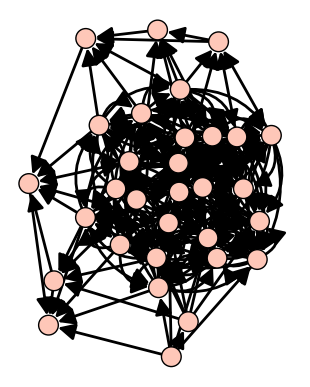

In [55]:
P = random_problem(2)
pretty_print(P)
print('\n\n')
pretty_print(basic_solutions(P))
show(solution_graph(P).plot(edge_labels=False, vertex_labels=False))